In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

Считываем данные и проверяем их на корректность.

In [2]:
data = pd.read_csv('gym_data.csv')

In [4]:
data.head()

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited,Unnamed: 12
0,10001,2000159,57328,37,0,1,6,10,1.06,134.200000,0.01,0,NaN
1,10002,2000235,29941,32,0,1,12,7,1.54,177.600000,0.07,0,NaN
2,10003,2000297,57328,29,0,1,6,5,2.15,205.000000,0.28,0,NaN
3,10004,2000435,29941,76,1,0,6,5,3.10,220.666667,0.39,0,NaN
4,10005,2000774,29941,24,1,0,1,3,1.00,142.040000,0.12,1,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 13 columns):
Row                             8100 non-null int64
Registration                    8100 non-null int64
Zipcode                         8100 non-null int64
Age                             8100 non-null int64
Partner_company                 8100 non-null int64
Friend_promo                    8100 non-null int64
Contract_period                 8100 non-null int64
Lifetime                        8100 non-null int64
Class_registration_weekly       8100 non-null float64
Avg_additional_charges_total    8100 non-null float64
Cancellation_freq               8100 non-null float64
Exited                          8100 non-null int64
Unnamed: 12                     0 non-null float64
dtypes: float64(4), int64(9)
memory usage: 822.7 KB


Избавляемся от мусора - столбцы `Row` и `Registration`, очевидно, не несут никакой информации о вероятности аннулирования клиентом подписки.
`Unnamed: 12`, похоже, оказался в данных по ошибке.

In [5]:
data.drop(columns = ['Unnamed: 12', 'Row', 'Registration'], inplace = True)

Отделим целевой признак от предикторов:

In [6]:
X = data.drop(columns = ['Exited'])
y = data.Exited

Разобьём данные на обучающую, валидационную и тестовую выборки в соотношении 70/15/15.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1603)

In [19]:
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1603)

Изучим распределение целевого признака в обучающей и валидационной выборках:

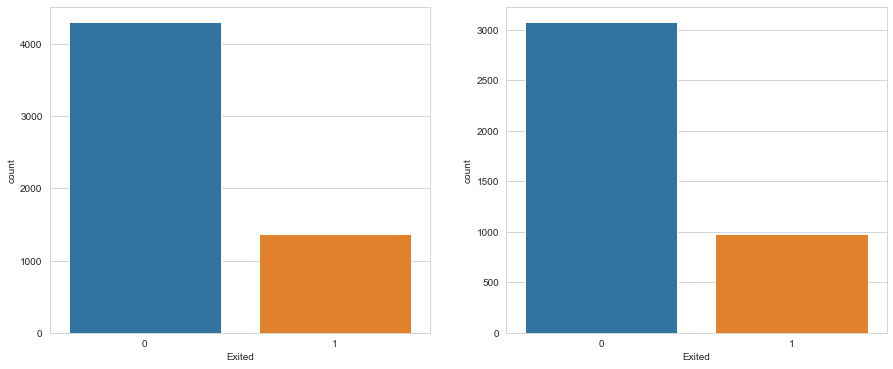

In [20]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
sns.countplot(y_train, ax = axes[0])
sns.countplot(y_valid, ax = axes[1])
plt.show()

In [22]:
y_train.value_counts(normalize = True)

0    0.757848
1    0.242152
Name: Exited, dtype: float64

In [23]:
y_test.value_counts(normalize = True)

0    0.751605
1    0.248395
Name: Exited, dtype: float64

Видим, что соотношение значений целевого признака в обучающей и валидационной выборке примерно одинаково. Будем работать с этими выборками.

Для данной задачи может подойти модель случайного леса. Протестируем разные значения параметра максимальной глубины.

In [24]:
max_f1 = -1
best_depth = None
for depth in range(1, 25):
    print('------')
    print('Глубина {}'.format(depth))
    model = RandomForestClassifier(n_estimators = 100, max_depth = depth, class_weight = 'balanced', oob_score = True)
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    f1 = f1_score(y_valid, pred)
    if f1 > max_f1:
        max_f1 = f1
        best_depth = depth
    print('F1: {}'.format(f1))
    print('OOB Accuracy:', model.oob_score_)
print('Лучшая глубина - {}'.format(best_depth))
print('Лучшая F1: {}'.format(max_f1))

------
Глубина 1
F1: 0.7646536412078153
OOB Accuracy: 0.8476190476190476
------
Глубина 2
F1: 0.8070973612374887
OOB Accuracy: 0.8844797178130511
------
Глубина 3
F1: 0.8692779613025011
OOB Accuracy: 0.9227513227513228
------
Глубина 4
F1: 0.9026036644165863
OOB Accuracy: 0.9430335097001764
------
Глубина 5
F1: 0.9228515625000001
OOB Accuracy: 0.9523809523809523
------
Глубина 6
F1: 0.9390962671905697
OOB Accuracy: 0.9603174603174603
------
Глубина 7
F1: 0.9571286141575273
OOB Accuracy: 0.9661375661375662
------
Глубина 8
F1: 0.9744104365278474
OOB Accuracy: 0.9703703703703703
------
Глубина 9
F1: 0.9843355229914098
OOB Accuracy: 0.9719576719576719
------
Глубина 10
F1: 0.9913573970513473
OOB Accuracy: 0.9723104056437389
------
Глубина 11
F1: 0.9949031600407747
OOB Accuracy: 0.9721340388007055
------
Глубина 12
F1: 0.9979570990806946
OOB Accuracy: 0.9760141093474427
------
Глубина 13
F1: 0.9989775051124744
OOB Accuracy: 0.9738977072310405
------
Глубина 14
F1: 1.0
OOB Accuracy: 0.97354

In [25]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 14, class_weight = 'balanced')

In [26]:
model.fit(X_train, y_train);

Делаем предсказания на тестовой выборке:

In [27]:
pred = model.predict(X_test)

Посмотрим на значение F1-меры

$$ F1 = 2 \cdot \frac{p \cdot r}{p + r}$$

Где $p$ - точность, а $r$ - полнота.

In [29]:
print('F1:', f1_score(y_test, pred))

F1: 0.9677093844601413


Оценим отдельно точность и полноту.

In [31]:
print('Precision:', precision_score(y_test, pred))
print('Recall:', recall_score(y_test, pred))

Precision: 0.9825819672131147
Recall: 0.9532803180914513


Таким образом, полученная модель выявляет примерно 95% реально ушедших клиентов. При этом, если модель назвала клиента уходящим, это так в 98% случаев. Я считаю эти результаты весьма достойными.